In [1]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from config import weather_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lons = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

# Identify nearest city for each lat, lng combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

595

In [3]:
# Set Up City Data Frame

cities_df = pd.DataFrame({"City": cities})
cities_df

,City
0,mahebourg
1,pelym
2,chokurdakh
3,port hardy
4,mataura
...,...
590,palmerston
591,okato
592,huilong
593,amazar


In [4]:
#Building OpenWeatehr url
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = {
    'appid': weather_key,
    'units': 'imperial'
}

print('Beginning Data Retrieval')
print('----------------------------')

# Retrieve Data from OpenWeather
for index, row in cities_df.iterrows():
    
    city = row['City']
    
    params['q'] = city
    
    print(f"Processing Record {index} | {city}.")
    
    # assemble url and make API request
    response = requests.get(base_url, params=params)
    json_response = response.json()
    
    try:
        
        cities_df.loc[index, 'Cloudiness'] = json_response['clouds']['all']
        cities_df.loc[index, 'Country'] = json_response['sys']['country']
        cities_df.loc[index, 'Date'] = json_response['dt']
        cities_df.loc[index, 'Humidity'] = json_response['main']['humidity']
        cities_df.loc[index, 'Lat'] = json_response['coord']['lat']
        cities_df.loc[index, 'Lng'] = json_response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = json_response['main']['temp_max']
        cities_df.loc[index, 'Wind Speed'] = json_response['wind']['speed']
        
    except (KeyError, IndexError):
        print("City not found... skipping.")

Beginning Data Retrieval
----------------------------
Processing Record 0 | mahebourg.
Processing Record 1 | pelym.
Processing Record 2 | chokurdakh.
Processing Record 3 | port hardy.
Processing Record 4 | mataura.
Processing Record 5 | kodiak.
Processing Record 6 | jamestown.
Processing Record 7 | qaanaaq.
Processing Record 8 | banda aceh.
Processing Record 9 | hobart.
Processing Record 10 | valera.
Processing Record 11 | port elizabeth.
Processing Record 12 | dikson.
Processing Record 13 | bubaque.
Processing Record 14 | albany.
Processing Record 15 | grand gaube.
Processing Record 16 | avarua.
Processing Record 17 | sitka.
Processing Record 18 | amderma.
City not found... skipping.
Processing Record 19 | souillac.
Processing Record 20 | ambon.
Processing Record 21 | yenagoa.
Processing Record 22 | pevek.
Processing Record 23 | arlit.
Processing Record 24 | bengkulu.
Processing Record 25 | padang.
Processing Record 26 | busselton.
Processing Record 27 | faanui.
Processing Record 28 |

Processing Record 225 | colorado.
Processing Record 226 | one hundred mile house.
City not found... skipping.
Processing Record 227 | mabaruma.
Processing Record 228 | les cayes.
Processing Record 229 | saint-joseph.
Processing Record 230 | anuradhapura.
Processing Record 231 | khatanga.
Processing Record 232 | nuevo progreso.
Processing Record 233 | anju.
Processing Record 234 | loandjili.
Processing Record 235 | san cristobal.
Processing Record 236 | tlahualilo.
City not found... skipping.
Processing Record 237 | port dickson.
Processing Record 238 | fortuna.
Processing Record 239 | tessalit.
Processing Record 240 | illoqqortoormiut.
City not found... skipping.
Processing Record 241 | saint-philippe.
Processing Record 242 | auki.
Processing Record 243 | saint-ambroise.
Processing Record 244 | puerto carreno.
Processing Record 245 | tecoanapa.
Processing Record 246 | koumac.
Processing Record 247 | san patricio.
Processing Record 248 | omsukchan.
Processing Record 249 | umm lajj.
Proc

Processing Record 451 | oudtshoorn.
Processing Record 452 | rocha.
Processing Record 453 | kosikha.
Processing Record 454 | ilulissat.
Processing Record 455 | sosnovo-ozerskoye.
Processing Record 456 | semnan.
Processing Record 457 | arenzano.
Processing Record 458 | kamaishi.
Processing Record 459 | balmedie.
Processing Record 460 | luau.
Processing Record 461 | puerto escondido.
Processing Record 462 | along.
Processing Record 463 | ola.
Processing Record 464 | guiratinga.
Processing Record 465 | saurimo.
Processing Record 466 | ouro fino.
Processing Record 467 | san buenaventura.
Processing Record 468 | ariquemes.
Processing Record 469 | kalomo.
City not found... skipping.
Processing Record 470 | klaksvik.
Processing Record 471 | ha giang.
Processing Record 472 | bella union.
Processing Record 473 | itarema.
Processing Record 474 | halifax.
Processing Record 475 | carutapera.
Processing Record 476 | clonakilty.
Processing Record 477 | gambo.
Processing Record 478 | bell ville.
Proce

In [5]:
#Drop cities without data
cities_df = cities_df.dropna()
cities_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [6]:
# Export data to csv file
cities_df.to_csv('cities.csv', header=True)

In [7]:
cities_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,mahebourg,40.0,MU,1.584214e+09,94.0,-20.41,57.70,77.00,1.12
1,pelym,84.0,RU,1.584214e+09,81.0,61.01,62.00,31.98,9.86
2,chokurdakh,69.0,RU,1.584214e+09,98.0,70.63,147.92,-28.14,4.25
3,port hardy,5.0,CA,1.584214e+09,31.0,50.70,-127.42,35.60,13.87
4,mataura,85.0,NZ,1.584213e+09,86.0,-46.19,168.86,51.01,1.99


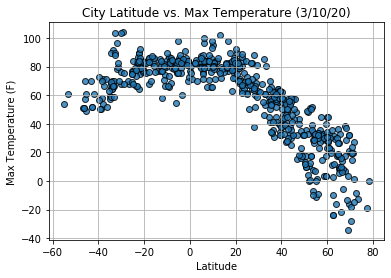

<Figure size 432x288 with 0 Axes>

In [9]:
# Create a Scatter Plot for max temperature vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Max Temp']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/LatvTemp.png")

The above code displays a scatterplot with data points that represent the max temperature and latitude of every city in the cities_df data frame on March 10, 2020. The scatterplot shows that max temperature for cities decreased the farther away that city is from the equator.

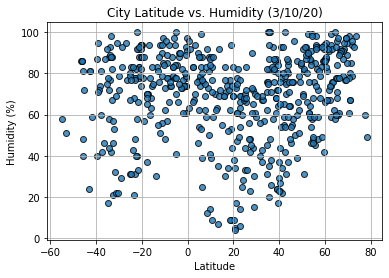

<Figure size 432x288 with 0 Axes>

In [10]:
# Create a Scatter Plot for humidity vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Humidity']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/LatvHum.png")

The above code displays a scatterplot with data points that represent the humidity percentage and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. The scatterplot shows that there does not appear to be much of a relationship between humidity and latitude.

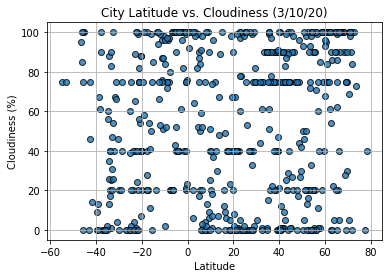

<Figure size 432x288 with 0 Axes>

In [11]:
# Create a Scatter Plot for cloudiness vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Cloudiness']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/LatvCloud.png")

The above code displays a scatterplot with data points that represent the cloudiness and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, it is difficult to ascertain a relationship between cloudiness and latitude, but it does appear that cloudiness percentages tend to be in increments of 20.

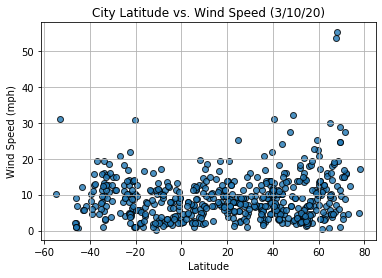

<Figure size 432x288 with 0 Axes>

In [12]:
# Create a Scatter Plot for wind speed vs latitude

x_values = cities_df['Lat']
y_values = cities_df['Wind Speed']
plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/LatvWind.png")

The above code displays a scatterplot with data points that represent the wind speed and latitude of every city in the cities_df data frame at a certain time on March 10, 2020. From the scatterplot, we can determine that wind speed appears to increase very slightly when a city's latitude increases past about 40 degrees north.

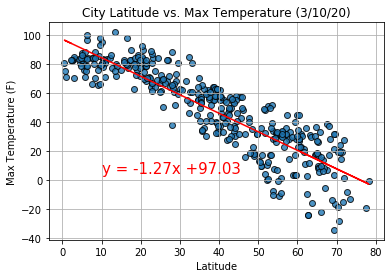

The r-squared is: -0.8827768356741048


<Figure size 432x288 with 0 Axes>

In [13]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(10,5),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/NorthLatvTemp.png")
print(f"The r-squared is: {rvalue}")

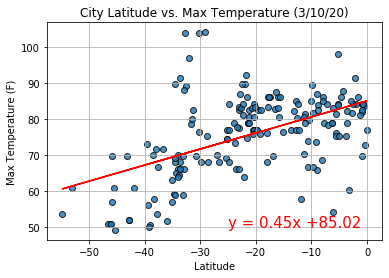

The r-squared is: 0.5249229603508281


<Figure size 432x288 with 0 Axes>

In [14]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Max Temp']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Latitude vs. Max Temperature (3/10/20)')
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/SouthLatvTemp.png")
print(f"The r-squared is: {rvalue}")

While the max temperature increases the closer a city is in both hemispheres, the relationship between latitude and max temperature is much stronger in the northern hemisphere than the southern hemisphere.

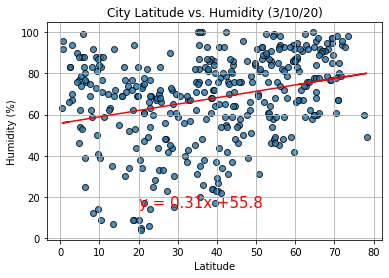

The r-squared is: 0.2848251293463141


<Figure size 432x288 with 0 Axes>

In [15]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/NorthLatvHum.png")
print(f"The r-squared is: {rvalue}")

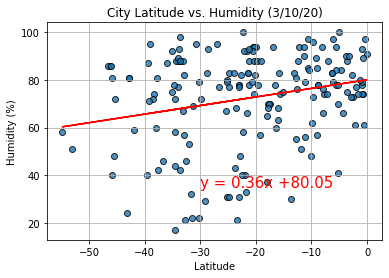

The r-squared is: 0.24268380409624885


<Figure size 432x288 with 0 Axes>

In [16]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Humidity']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (3/10/20)')
plt.annotate(line_eq,(-30,35),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/SouthLatvHum.png")
print(f"The r-squared is: {rvalue}")

Linear regression tell us that, in the northern hemisphere, a city's humidity percentage actually increases the farther north it is from the equator. Meanwhile, in the southern hemisphere, a city's humitidy percentage decreases the farther south it is from the equator. However, the relationship between latitude and humidity is not particularly strong in either hemisphere. 

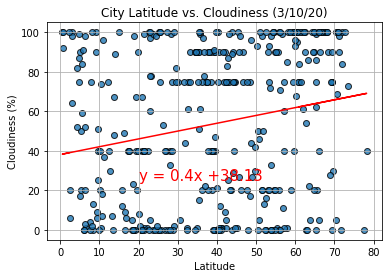

The r-squared is: 0.2068919688215572


<Figure size 432x288 with 0 Axes>

In [17]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(20,25),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/NorthLatvCloud.png")
print(f"The r-squared is: {rvalue}")

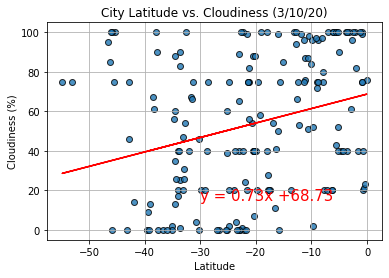

The r-squared is: 0.2747757816817079


<Figure size 432x288 with 0 Axes>

In [18]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Cloudiness']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (3/10/20)')
plt.annotate(line_eq,(-30,15),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/SouthLatvCloud.png")
print(f"The r-squared is: {rvalue}")

The relationship between cloudiness and latitude is not very strong in either hemisphere. However, cloudiness in the southern hemisphere generally does decrease in cities farther from the equator, while in the northern hemisphere, the cloudiness increases the farther from the equator the cities are. 

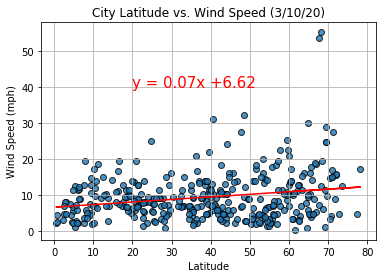

The r-squared is: 0.21817816633766754


<Figure size 432x288 with 0 Axes>

In [19]:
north_df = cities_df.loc[cities_df['Lat'] > 0]
x_values = north_df['Lat']
y_values = north_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/NorthLatvWind.png")
print(f"The r-squared is: {rvalue}")

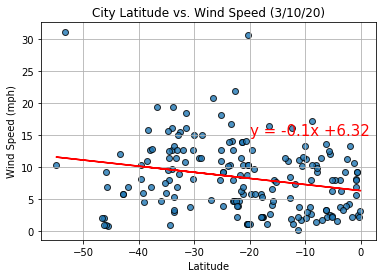

The r-squared is: -0.23263269847627913


<Figure size 432x288 with 0 Axes>

In [20]:
south_df = cities_df.loc[cities_df['Lat'] < 0]
x_values = south_df['Lat']
y_values = south_df['Wind Speed']

# Perform a linear regression on temperature vs. latitude
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept

# Create line equation string
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

plt.scatter(x_values,y_values, alpha=.8, edgecolors="black")
plt.plot(x_values,regress_values,"r-")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('City Latitude vs. Wind Speed (3/10/20)')
plt.annotate(line_eq,(-20,15),fontsize=15,color="red")
plt.grid()
plt.show()
plt.savefig("../WeatherPy/Images/SouthLatvWind.png")
print(f"The r-squared is: {rvalue}")

Again, there is only a very weak relationship between wind speed and latitude in both hemispheres. Generally, wind speed increases in both hemispheres the farther away a city is from the equator.

Overall Takeaways: 

1. The city variable with the greatest relationship with latitude is max temperature. Temperatures rise as you move closer to the equator
2. In the northern hemisphere, humidity and max temperature are not positively correlated. It appears that as a max temperature increases, humidity decreases slightly in the northern hempisphere - at least in March. 
3. One observation that could impact the outcome of this data analysis is that there are significantly more northern hemisphere cities than southern hemisphere cities. Therefore, the southern hemisphere conclusions may be slightly less reliable than the conclusions regarding the northern hemisphere. 